In [76]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [78]:
df = pd.read_csv('SA_Aqar.csv')
df.head()

,city,district,front,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,...,roof,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price,details
0,الرياض,حي العارض,شمال,250,0,5,5,1,1,1,...,0,0,1,0,1,1,0,0,80000,للايجار فيلا دبلكس في موقع ممتاز جدا بالقرب من...
1,الرياض,حي القادسية,جنوب,370,0,4,5,2,1,1,...,0,0,1,0,0,1,0,0,60000,*** فيلا درج مع الصالة جديدة ***\n\nعبارة عن م...
2,الرياض,حي القادسية,جنوب,380,0,4,5,1,1,1,...,1,0,1,0,0,1,0,0,60000,فيلا للايجار درج داخلي مشب خارجي مجلس مقلط وصا...
3,الرياض,حي المعيزلة,غرب,250,0,5,5,3,0,1,...,0,0,1,0,0,0,0,0,55000,فيلا للايجار جديده لن تستخدم ش...
4,الرياض,حي العليا,غرب,400,11,7,5,2,1,1,...,1,0,1,0,1,1,0,0,70000,فيلا للايجار حي العليا \n\nالارضي مجالس وغرفتي...


In [80]:
df.dtypes

city            object
district        object
front           object
size             int64
property_age     int64
bedrooms         int64
bathrooms        int64
livingrooms      int64
kitchen          int64
garage           int64
driver_room      int64
maid_room        int64
furnished        int64
ac               int64
roof             int64
pool             int64
frontyard        int64
basement         int64
duplex           int64
stairs           int64
elevator         int64
fireplace        int64
price            int64
details         object
dtype: object

In [82]:
df["city"].unique()

array([' الرياض', ' جدة', ' الدمام', ' الخبر'], dtype=object)

In [84]:
df["district"].unique()

array(['   حي العارض ', '   حي القادسية ', '   حي المعيزلة ',
       '   حي العليا ', '   حي الازدهار ', '   حي المهدية ',
       '   حي الحزم ', '   حي الصحافة ', '   حي بنبان ',
       '   حي النسيم الغربي ', '   حي النرجس ', '   حي الملز ',
       '   حي الياسمين ', '   حي المونسية ', '   حي السليمانية ',
       '   حي العقيق ', '   حي المرسلات ', '   حي الرحمانية ',
       '   حي الرمال ', '   حي طويق ', '   حي الملقا ', '   حي النزهة ',
       '   حي الربيع ', '   حي ظهرة لبن ', '   حي الروضة ', '   حي عكاظ ',
       '   حي الورود ', '   حي الفيحاء ', '   حي النموذجية ',
       '   حي الربوة ', '   حي القيروان ', '   حي عليشة ',
       '   حي الملك فيصل ', '   حي حطين ', '   حي المناخ ',
       '   حي البديعة ', '   حي الشهداء ', '   حي قرطبة ',
       '   حي العريجاء الغربية ', '   حي النفل ', '   حي القدس ',
       '   حي الملك فهد ', '   حي العزيزية ', '   حي الواحة ',
       '   حي النسيم الشرقي ', '   حي المصيف ', '   حي الزهرة ',
       '   حي اليرموك ', '   حي الملك عبدالله

In [88]:

# Initialize OneHotEncoder
ohe = OneHotEncoder(sparse_output=False)

# Select the columns you want to one-hot encode
columns_to_encode = ['city', 'district']

# Fit and transform the encoder
one_hot_encoded = ohe.fit_transform(df[columns_to_encode])

# Convert to DataFrame
one_hot_df = pd.DataFrame(one_hot_encoded, columns=ohe.get_feature_names_out(columns_to_encode))

# Join the one-hot encoded columns back to the original DataFrame (excluding the original categorical columns)
df_final = df.drop(columns=columns_to_encode).join(one_hot_df)

# Display the first few rows of the updated DataFrame
print(df_final.head())


  front  size  property_age  bedrooms  bathrooms  livingrooms  kitchen  \
0  شمال   250             0         5          5            1        1   
1  جنوب   370             0         4          5            2        1   
2  جنوب   380             0         4          5            1        1   
3   غرب   250             0         5          5            3        0   
4   غرب   400            11         7          5            2        1   

   garage  driver_room  maid_room  ...  district_   حي عليشة   \
0       1            0          1  ...                    0.0   
1       1            0          0  ...                    0.0   
2       1            1          1  ...                    0.0   
3       1            1          1  ...                    0.0   
4       1            1          1  ...                    0.0   

   district_   حي غبيرة   district_   حي غرناطة   district_   حي قرطبة   \
0                    0.0                     0.0                    0.0   
1             

In [3]:
df['price'].value_counts()

price
60000     324
80000     311
65000     235
100000    196
90000     194
         ... 
650000      1
4000        1
143000      1
330000      1
49950       1
Name: count, Length: 113, dtype: int64

In [90]:
#Extract the numeric variables 
numeric_df = df.iloc[:,0:22]
numeric_df.head()

,city,district,front,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,...,furnished,ac,roof,pool,frontyard,basement,duplex,stairs,elevator,fireplace
0,الرياض,حي العارض,شمال,250,0,5,5,1,1,1,...,0,0,0,0,1,0,1,1,0,0
1,الرياض,حي القادسية,جنوب,370,0,4,5,2,1,1,...,0,0,0,0,1,0,0,1,0,0
2,الرياض,حي القادسية,جنوب,380,0,4,5,1,1,1,...,0,0,1,0,1,0,0,1,0,0
3,الرياض,حي المعيزلة,غرب,250,0,5,5,3,0,1,...,0,0,0,0,1,0,0,0,0,0
4,الرياض,حي العليا,غرب,400,11,7,5,2,1,1,...,0,0,1,0,1,0,1,1,0,0


In [92]:
import pandas as pd

df['city'] = df['city'].str.strip()
city_mapping = {'الرياض': 1, 'جدة': 2, 'الدمام': 3}
df['city_numeric'] = df['city'].map(city_mapping)
numeric_df = df.select_dtypes(include=[float, int])
if 'city_numeric' not in numeric_df.columns:
    numeric_df = pd.concat([numeric_df, df['city_numeric']], axis=1)
corr = numeric_df.corr()
corr

,size,property_age,bedrooms,bathrooms,livingrooms,kitchen,garage,driver_room,maid_room,furnished,...,roof,pool,frontyard,basement,duplex,stairs,elevator,fireplace,price,city_numeric
size,1.000000,0.026605,-0.001659,-0.020684,-0.003165,-0.002841,0.026136,0.050188,-0.019671,0.000228,...,-0.005264,0.037103,0.024471,0.019690,-0.010833,0.009946,0.004103,0.014135,0.055199,-0.012254
property_age,0.026605,1.000000,0.019242,-0.015376,0.045143,0.113298,-0.115827,0.229479,0.123351,-0.086590,...,-0.051128,-0.067364,0.040116,0.065122,-0.212236,0.059045,-0.061000,0.017599,0.156226,-0.184680
bedrooms,-0.001659,0.019242,1.000000,0.428383,0.117873,-0.117855,0.180438,-0.001162,0.136515,-0.035578,...,0.260171,-0.233998,0.226132,-0.018852,0.059557,0.105136,0.068742,0.309624,-0.055860,0.208027
bathrooms,-0.020684,-0.015376,0.428383,1.000000,0.407682,-0.064741,0.207669,0.212013,0.281067,-0.170169,...,0.208967,-0.201461,0.264357,0.048366,0.145092,0.229664,0.102957,0.025026,0.039583,0.008262
livingrooms,-0.003165,0.045143,0.117873,0.407682,1.000000,-0.017165,0.073331,0.308451,0.081950,-0.135604,...,0.149828,-0.015394,0.179971,0.143856,0.004689,-0.012590,0.182475,-0.081845,0.163844,0.079680
kitchen,-0.002841,0.113298,-0.117855,-0.064741,-0.017165,1.000000,0.003030,0.063800,0.053458,0.112787,...,-0.082984,0.121265,-0.095389,0.038742,-0.072476,-0.030222,0.059358,-0.045981,0.086546,0.142291
garage,0.026136,-0.115827,0.180438,0.207669,0.073331,0.003030,1.000000,0.204983,0.249873,0.092054,...,0.156525,0.026654,0.262338,0.067415,0.104766,0.049328,0.125179,0.109371,0.075580,-0.044981
driver_room,0.050188,0.229479,-0.001162,0.212013,0.308451,0.063800,0.204983,1.000000,0.314959,-0.038470,...,0.091367,0.021291,0.159256,0.139336,-0.151171,0.110739,0.192867,-0.028066,0.297801,-0.065217
maid_room,-0.019671,0.123351,0.136515,0.281067,0.081950,0.053458,0.249873,0.314959,1.000000,0.046504,...,0.098584,-0.109109,0.121861,0.069712,-0.042543,0.272245,0.121239,-0.007001,0.188361,-0.008084
furnished,0.000228,-0.086590,-0.035578,-0.170169,-0.135604,0.112787,0.092054,-0.038470,0.046504,1.000000,...,-0.018620,0.284684,0.058777,0.005948,-0.106705,-0.073224,0.086449,0.020782,0.157764,0.130911


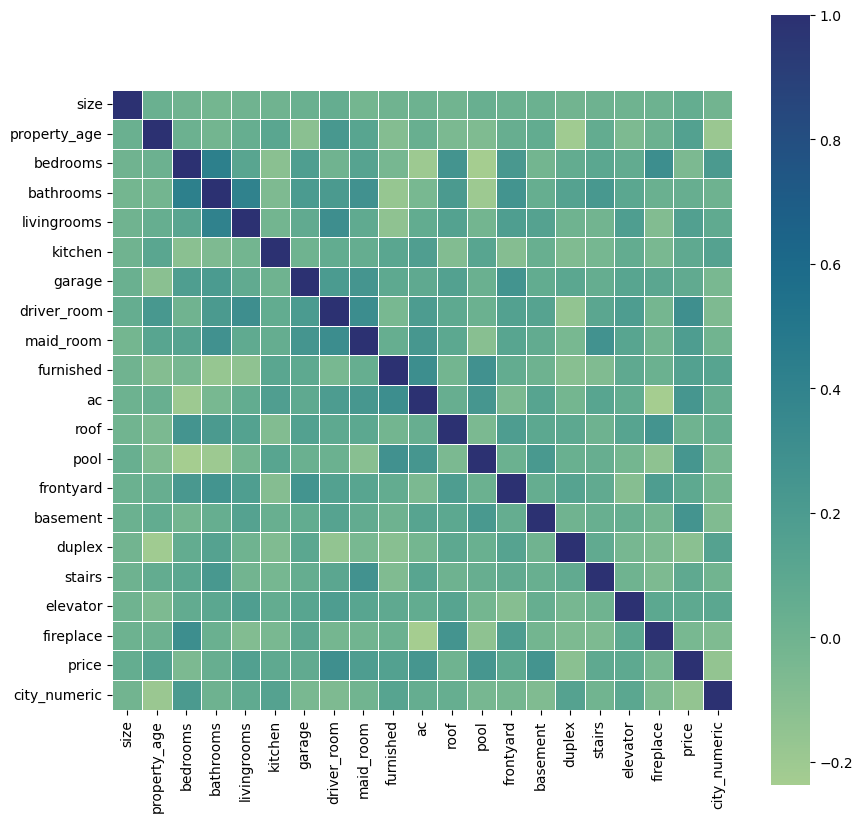

In [94]:
plt.figure(figsize=(10, 10))
sns.heatmap(corr, square = True, cmap= 'crest', linewidth = 0.5)
plt.show()